In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import glob
import cv2
%matplotlib notebook

In [2]:
# Change this to the directory where you store examples
basedir = './files/'
image_index = '000005_10'
l_ifile = basedir+image_index+'_l.png'
r_ifile = basedir+image_index+'_r.png'
disp_file = basedir+image_index+'_dnoc.png'
imL = cv2.imread(l_ifile,0)
imR = cv2.imread(r_ifile,0)
disp_gt = cv2.imread(disp_file,0)
plt.rcParams["figure.figsize"] = (11,4)

In [ ]:
# Change this to the directory where you store KITTI data
basedir = '../data_stereo_flow/training/'
image_index = '000001_10'
l_ifile = basedir+'image_0/'+image_index+'.png'
r_ifile = basedir+'image_1/'+image_index+'.png'
disp_file = basedir+'disp_noc/'+image_index+'.png'
imL = cv2.imread(l_ifile,0)
imR = cv2.imread(r_ifile,0)
disp_gt = cv2.imread(disp_file,0)
plt.rcParams["figure.figsize"] = (11,4)

<IPython.core.display.Javascript object>


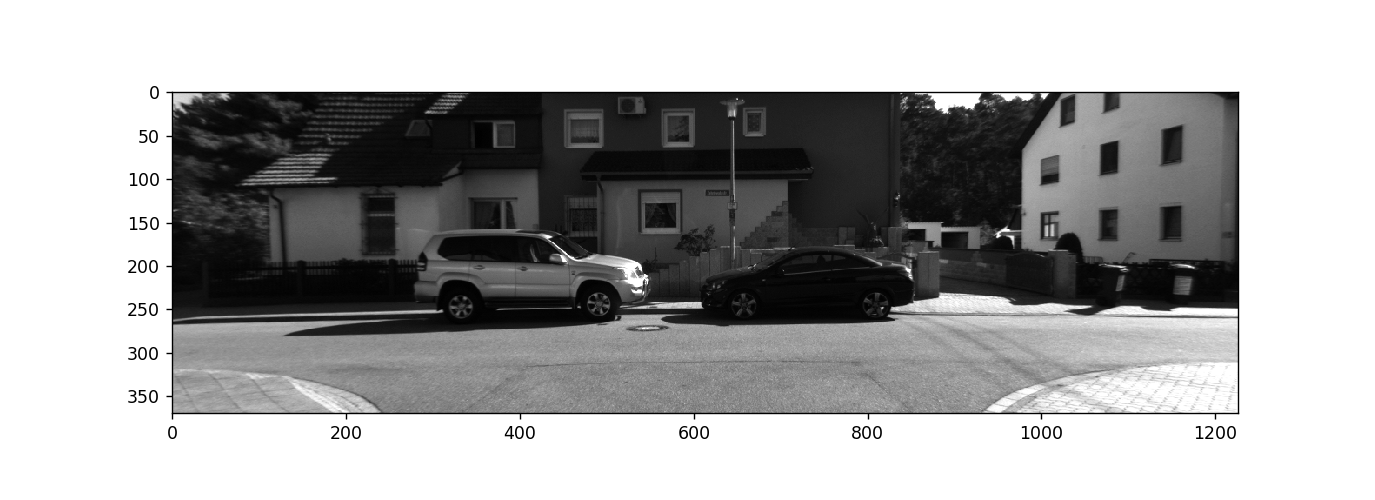

<IPython.core.display.Javascript object>


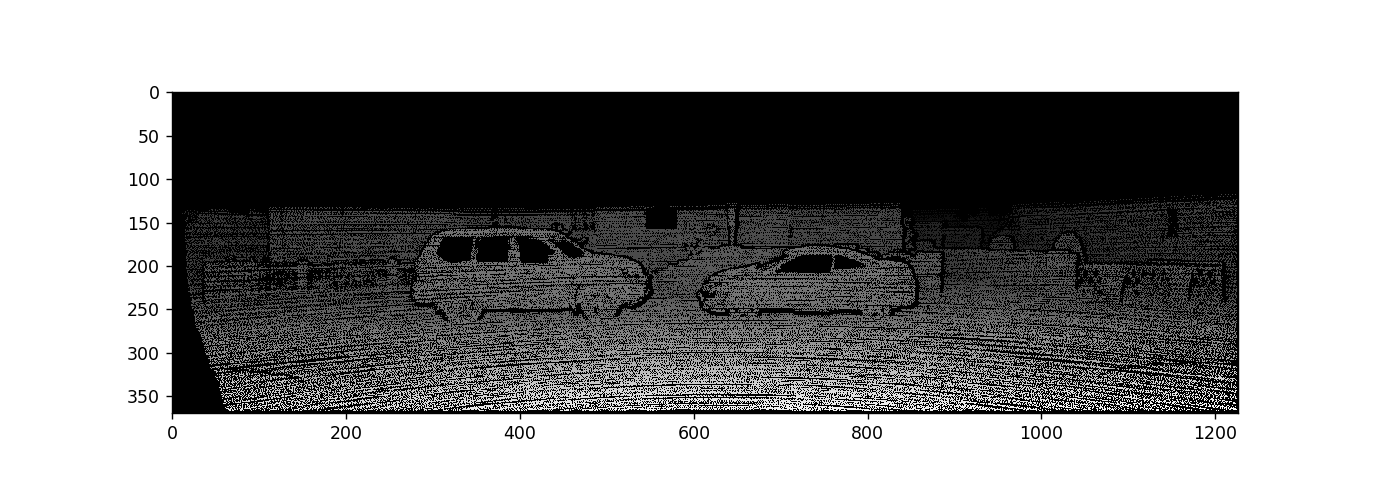

In [3]:
plt.figure()
plt.imshow(imL,cmap='gray')
plt.figure()
plt.imshow(disp_gt,cmap='gray')

nSamples=107347, nErrors=33590, Accuracy=68.71


<IPython.core.display.Javascript object>


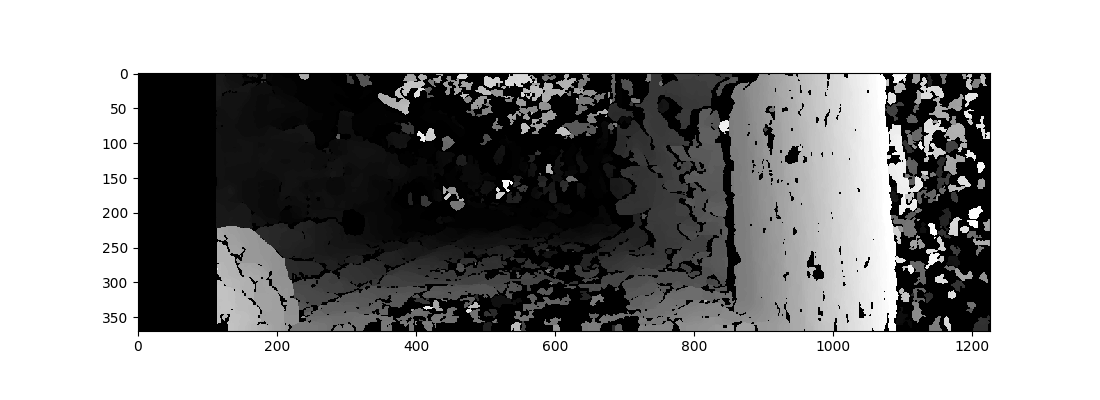

In [29]:
window_size = 3
min_disp=16
num_disp=112-min_disp
#stereo = cv2.createStereoBM(numDisparities=16, blockSize=15)
stereo = cv2.StereoSGBM_create(minDisparity = min_disp, numDisparities=num_disp, blockSize=16,P1 = 8*3*window_size**2,
        P2 = 32*3*window_size**2,
        disp12MaxDiff = 1,
        uniquenessRatio = 10,
        speckleWindowSize = 100,
speckleRange = 32)
disp = stereo.compute(imL,imR).astype(np.float32)/16 # 4 fractional bits 
(m,n) = imL.shape
(num_samples,num_errors)=(0,0)
for ii in range(m):
    for jj in range(n):
        dgt = disp_gt[ii,jj]
        dcomp = disp[ii,jj]
        if dgt > 0:
            num_samples += 1
            if abs(dgt-dcomp) > 3:
                num_errors += 1
print('nSamples={}, nErrors={}, Accuracy={:.2f}'.format(num_samples,num_errors,100.0*(1-num_errors/num_samples)))
plt.figure()
plt.imshow(disp.astype(int),cmap = 'gray')